In [19]:
using Pkg
Pkg.add("Plots")
Pkg.add("LinearAlgebra")
using Plots
using LinearAlgebra

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.11/Project.toml`
  [37e2e46d] + LinearAlgebra v1.11.0
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


# Gaussian Distribution

$$
p(x) = (2\pi\sigma^2)^{-\frac{1}{2}} \exp{\left(-\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2}\right)}
$$

Where:
- $p(x)$ is the probability density function of the Gaussian distribution
- $\mu$ is the mean of the distribution
- $\sigma$ is the standard deviation of the distribution
- $x$ is the value at which the probability density function is evaluated



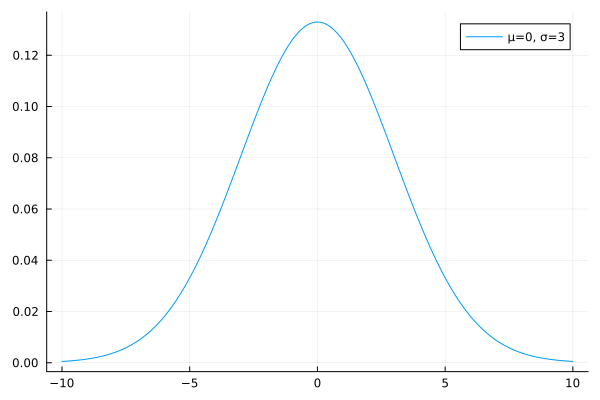

In [16]:
"""
    univariate_gaussian_pdf(x, μ, σ)

Compute the probability density function of a univariate Gaussian distribution.

# Arguments
- `x::Float64`: The value at which to evaluate the PDF.
- `μ::Float64`: The mean of the Gaussian distribution. (mu)
- `σ::Float64`: The standard deviation of the Gaussian distribution. (sigma)

# Returns
- `Float64`: The value of the PDF at `x`.

# Example
```julia
x = -10:0.1:10
y = univariate_gaussian_pdf.(x, 0, 3)
plot(x, y, label="μ=0, σ=3")
```
"""
function univariate_gaussian_pdf(x, μ, σ)
    π = 3.141592653589793
    return (1 / sqrt( 2*π * (σ^2) )) * exp(-0.5 * ((x-μ)^2) / σ^2)
end 

x = -10:0.1:10
y = univariate_gaussian_pdf.(x, 0, 3)
plot(x, y, label="μ=0, σ=3")


# Multivariate Gaussian Distribution

$$
p(x) = det(2\pi\Sigma)^{-\frac{1}{2}} \exp{\left(-\frac{1}{2} (x-\mu)^T \Sigma^{-1}
(x-\mu)\right)}
$$

Where:
- $p(x)$ is the probability density function of the multivariate Gaussian distribution
- $\mu$ is the mean of the distribution
- $\Sigma$ is the covariance matrix of the distribution
- $x$ is the value at which the probability density function is evaluated   
$$

The value of the PDF at x=[0, 0] is 0.15915494309189535


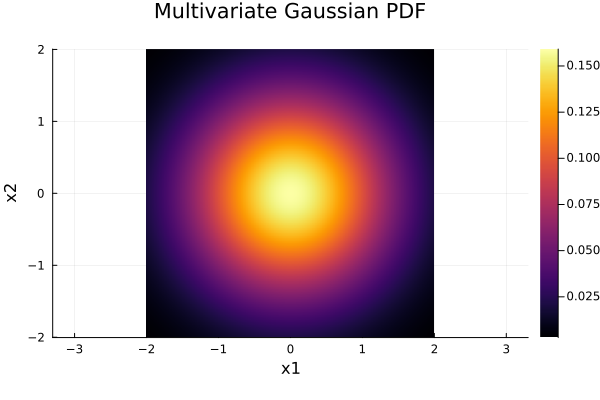

In [25]:
"""
    multivariate_gaussian_pdf(x, μ, Σ)

Compute the probability density function of a multivariate Gaussian distribution.

# Arguments
- `x::Array{Float64,1}`: The value at which to evaluate the PDF.
- `μ::Array{Float64,1}`: The mean of the Gaussian distribution.
- `Σ::Array{Float64,2}`: The covariance matrix of the Gaussian distribution.

# Returns
- `Float64`: The value of the PDF at `x`.

# Example
```julia
x = [0, 0]
μ = [0, 0]
Σ = [1 0; 0 1]
multivariate_gaussian_pdf(x, μ, Σ)
```
"""

function multivariate_gaussian_pdf(x, μ, Σ)
    π = 3.141592653589793
    D = length(x) # Dimension of the distribution
    
    return  (1 / sqrt(det(2*π*Σ))) * exp(-0.5 * (x-μ)' * inv(Σ) * (x-μ))
end

# Test and plot it
x = [0, 0]
μ = [0, 0]
Σ = [1 0; 0 1]
y = multivariate_gaussian_pdf(x, μ, Σ)
println("The value of the PDF at x=$x is $y")


# Plot the distribution
x = -2:0.01:2
y = [multivariate_gaussian_pdf([x[i], x[j]], μ, Σ) for i in 1:length(x), j in 1:length(x)]
heatmap(x, x, y, aspect_ratio=1, xlabel="x1", ylabel="x2", title="Multivariate Gaussian PDF")
